#### Cloning Github Repo

In [0]:
import os
import shutil
from getpass import getpass
import warnings
warnings.filterwarnings("ignore")

try:
  os.chdir("Automated-Ticketing-System")
except:
  username = input('Github username: ')
  password = getpass('Github password: ')
  os.environ['GITHUB_AUTH'] = username + ':' + password

  !git clone https://$GITHUB_AUTH@github.com/Gnommer/Automated-Ticketing-System --branch submission
  os.chdir("Automated-Ticketing-System")
  !pip3 install -r requirements_colab.txt >> install_logs.txt
  !wget -O /tmp/lid.176.bin https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
  !python3 -m spacy download en_core_web_sm

#### Importing Dependencies

In [0]:
import pandas as pd
from Pipelines import NLP_Pipeline

import matplotlib.pyplot as plt

In [0]:
pipeline1 = NLP_Pipeline(file_path="Dataset/Dataset.xlsx")

#### Loading Dataset

In [0]:
df = pipeline1.read_dataset()

In [7]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,0
4,skype error,skype error,owlgqjme qhcozdfx,0


#### Exploratory Data Analysis

##### Shape of the Data Frame

In [0]:
df.shape

(8500, 4)

##### Missing values

In [0]:
pd.DataFrame(df.isna().sum()).T

,Short description,Description,Caller,Assignment group
0,8,1,0,0


there are 8 records with short description which is missing
and 1 record with the description missing

In [0]:
df[df.isna()["Short description"]]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,0


In [0]:
df[df.isna()["Description"]]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,0


so we will be removing these records for now. the system should prevent the cases from accepting tickets without descriptions. or we have to generate additional features to supplement this problem

In [0]:
df = df.dropna()

#### Distributions of the labels

There are more Group 0 tickets than others.

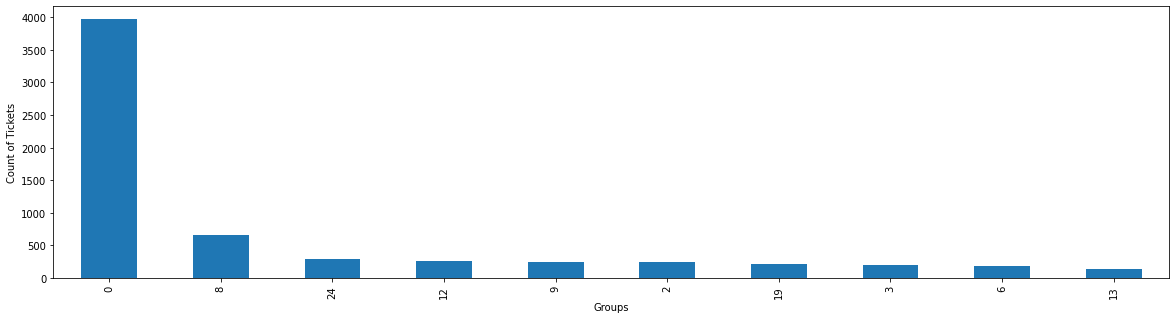

In [0]:
plt.figure(figsize=(20, 5))
df["Assignment group"].value_counts()[:10].plot(kind='bar')
plt.yscale('linear')
plt.ylabel("Count of Tickets")
plt.xlabel("Groups")
plt.show()

There are clear bins formed for the complaints when the issues are explored in a log scale. Group 0 is the highest

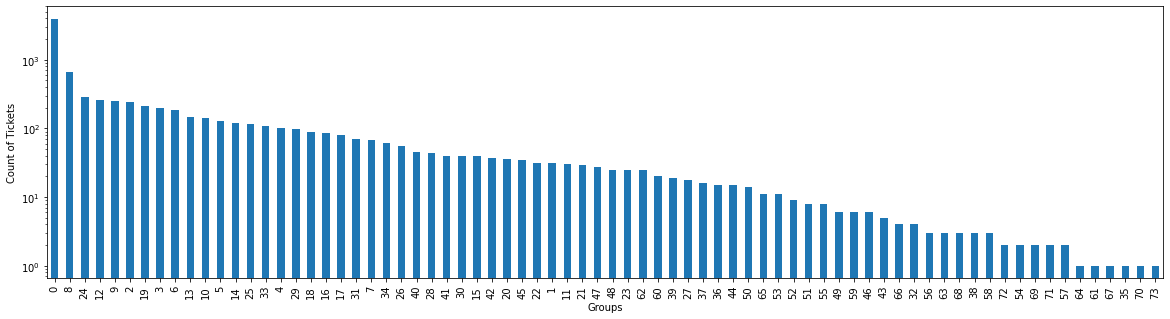

In [0]:
plt.figure(figsize=(20, 5))
df["Assignment group"].value_counts().plot(kind='bar')
plt.yscale('log')
plt.ylabel("Count of Tickets")
plt.xlabel("Groups")
plt.show()

#### Presence of different languages

As we can see below there are tickets which are not completely in english. this ticket is in German. so we need to write a strategy to find the languages of the tickets based on the description and short description.

In [0]:
df[df.index == 255]

,Short description,Description,Caller,Assignment group
255,probleme mit laufwerk z: \laeusvjo fvaihgpx,probleme mit laufwerk z: \laeusvjo fvaihgpx,laeusvjo fvaihgpx,24


In [0]:
df = pipeline1.preprocess_data()

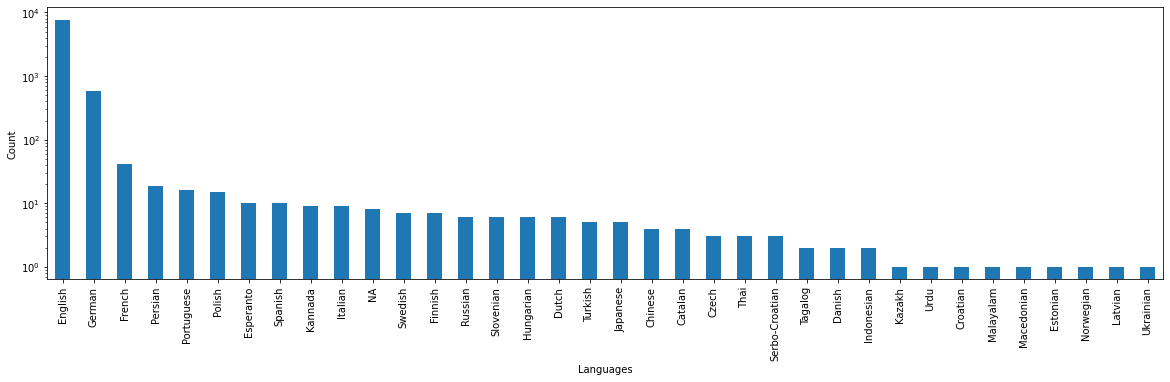

In [0]:
plt.figure(figsize=(20, 5))
df["des_lang"].value_counts().plot(kind='bar')
plt.yscale('log')
plt.ylabel("Count")
plt.xlabel("Languages")
plt.show()

In [0]:
print(df["des_lang"].value_counts().index[0], ": ", df["des_lang"].value_counts()[0])

English :  7692


In [0]:
print("Non English Tickets: ", len(df) - df["des_lang"].value_counts()[0])

Non English Tickets:  799


more english tickets are present when compared to other languages

#### Preprocessed Dataframe

In [6]:
df = pipeline1.preprocess_data()

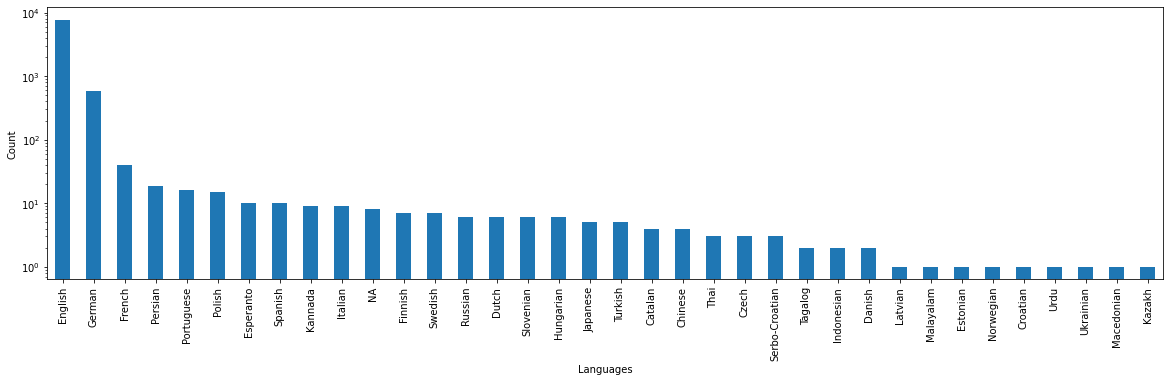

In [8]:
plt.figure(figsize=(20, 5))
df["des_lang"].value_counts().plot(kind='bar')
plt.yscale('log')
plt.ylabel("Count")
plt.xlabel("Languages")
plt.show()

In [9]:
df.iloc[8471, :]

Short description             电脑开机开不出来
Description           to 小贺,早上电脑开机开不出来
Caller               xqyjztnm onfusvlz
Assignment group                    30
clean_des                           ()
clean_sdes                          ()
des_lang                       English
sdes_lang                      English
des_has_email                    False
sdes_has_email                   False
des_has_domain                   False
sdes_has_domain                  False
des_has_url                      False
sdes_has_url                     False
Name: 8471, dtype: object

In [11]:
df.head()

,Short description,Description,Caller,Assignment group,clean_des,clean_sdes,des_lang,sdes_lang,des_has_email,sdes_has_email,des_has_domain,sdes_has_domain,des_has_url,sdes_has_url
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,0,"(verify, user, detail, employee, manager, chec...","(login, issue)",English,English,False,False,False,False,False,False
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,0,"(receive, hmjdrvpb.komuaywn@gmail.com, hello, ...",(outlook),English,English,True,False,True,False,False,False
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,0,"(receive, eylqgodm.ybqkwiam@gmail.com, hello, ...","(not, log, vpn)",English,English,True,False,True,False,False,False
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,0,"(unable, access, hr, tool, page)","(unable, access, hr, tool, page)",English,English,False,False,False,False,False,False
4,skype error,skype error,owlgqjme qhcozdfx,0,"(skype, error)","(skype, error)",Japanese,Japanese,False,False,False,False,False,False
